# **Practice Project: Insurance Cost Analysis (Fikri Haidar)** 

In this project, i have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, i will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


I'll be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [ ]:
#install required packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


In [ ]:
# Loading the dataset with correct link from IBM Cloud Object Storage Dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# 1. Import the dataset

Import the dataset into a `pandas` dataframe. There are currently no headers in the CSV file. 


In [6]:
df = pd.read_csv(path, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


Add the headers to the dataframe, as mentioned in the project scenario. 


In [ ]:
#add headers to the dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

#replace '?' with NaN values
df.replace('?', np.nan, inplace = True)


# 2. Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [9]:
print(df.info)

<bound method DataFrame.info of      age  gender     bmi  no_of_children smoker  region      charges
0     19       1  27.900               0      1       3  16884.92400
1     18       2  33.770               1      0       4   1725.55230
2     28       2  33.000               3      0       4   4449.46200
3     33       2  22.705               0      0       1  21984.47061
4     32       2  28.880               0      0       1   3866.85520
...   ..     ...     ...             ...    ...     ...          ...
2767  47       1  45.320               1      0       4   8569.86180
2768  21       1  34.600               0      0       3   2020.17700
2769  19       2  26.030               1      1       1  16450.89470
2770  23       2  18.715               0      0       1  21595.38229
2771  54       2  31.600               0      0       3   9850.43200

[2772 rows x 7 columns]>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.


In [10]:
# Handling missing values
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [12]:
df[["charges", "bmi"]] = np.round(df[["charges", "bmi"]], 2)
print(df.head())


   age  gender    bmi  no_of_children  smoker  region   charges
0   19       1  27.90               0       1       3  16884.92
1   18       2  33.77               1       0       4   1725.55
2   28       2  33.00               3       0       4   4449.46
3   33       2  22.70               0       0       1  21984.47
4   32       2  28.88               0       0       1   3866.86


# 3. Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

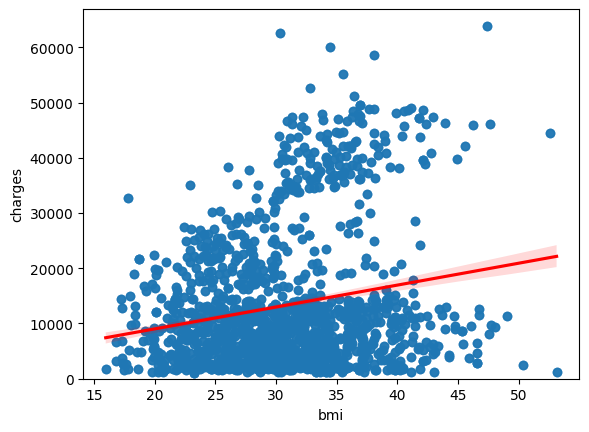

In [ ]:
# Create a regression plot to visualize the relationship between BMI and charges
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)


Implement the box plot for `charges` with respect to `smoker`.


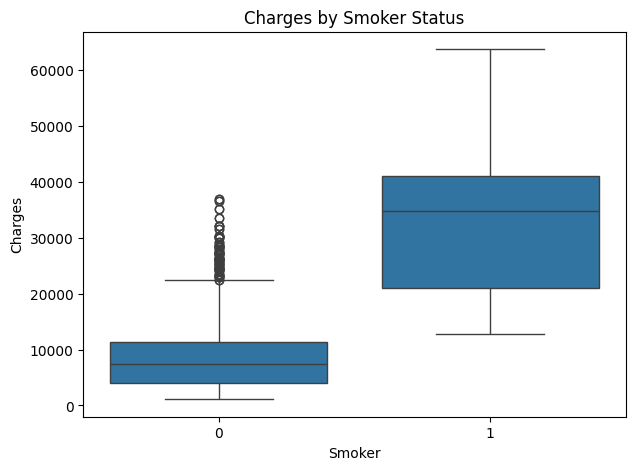

In [25]:
#box plot to visualize charges for smokers and non-smokers
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='charges', data=df)

plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Print the correlation matrix for the dataset.


In [ ]:
#correlation dataset
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113054        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042929        0.016020  0.082326   
bmi             0.113054  0.042929  1.000000       -0.001488  0.011482   
no_of_children  0.037574  0.016020 -0.001488        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011482        0.006362  1.000000   
region         -0.007167  0.022213  0.271090       -0.025717  0.054077   
charges         0.298624  0.062837  0.199839        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271090  0.199839  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


# 4. Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [16]:
# Linear Regression Model: charges vs smoker
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))


0.6221791733924185


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model to see an improvement in the performance.


In [ ]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))


0.7504068682813502


Create a training `pipeline` that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset to improvement in the performance.


In [ ]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', 
        PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452576585425424


# 5. Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [19]:

# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [20]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))


0.6760802163185443


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


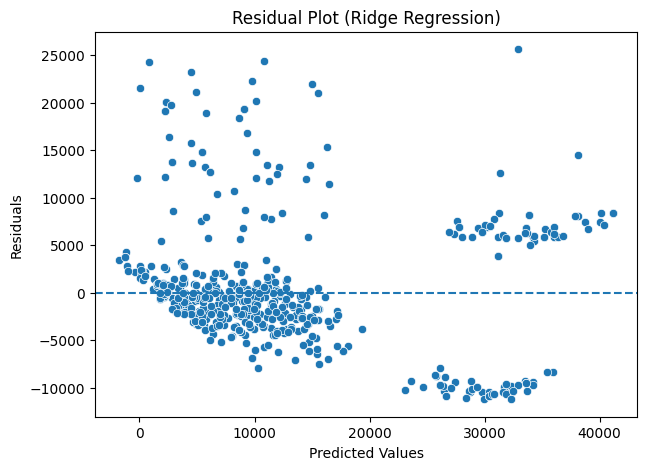

In [ ]:
#plot regression plot for test data
residuals = y_test - yhat

plt.figure(figsize=(7,5))
sns.scatterplot(x=yhat, y=residuals)
plt.axhline(0, linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge Regression)")
plt.show()


In [21]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))


0.7835696037870288


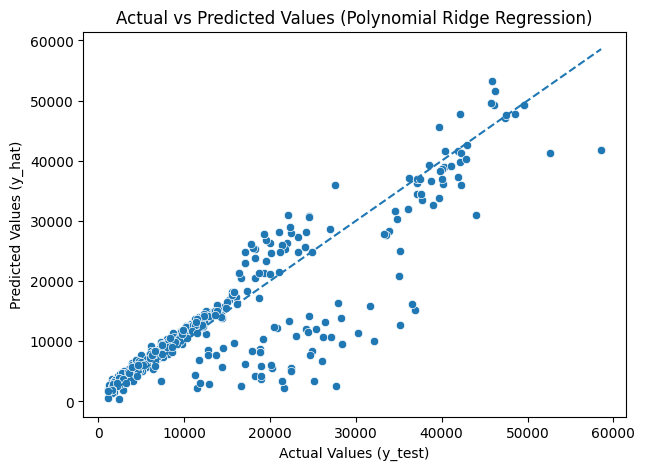

In [22]:
# plot actual vs predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_hat)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_hat)")
plt.title("Actual vs Predicted Values (Polynomial Ridge Regression)")
plt.show()

# Thank You!


<h7> Fikri Haidar Aufi (2026) </h7>
